In [1]:
import random
import numpy as np
import torch
import utils
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# !pip install gym[atari]
# !pip uninstall ale-py
# !pip install ale-py

In [2]:
from Config.config2_ddqn import config #its our config

In [3]:
from Environment import PreprocessAtariObs, make_env
import torch
import gymnasium as gym
from gym.wrappers import Monitor
import torch.nn as nn
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# those who have a GPU but feel unfair to use it can uncomment:
# device = torch.device('cpu')
device
from DQNAgent import DQNAgent

env = make_env(config['seed'], skip=4)
# env = Monitor(env, "video2")
state_shape = env.observation_space.shape
n_actions = env.action_space.n
state = env.reset()

agent = DQNAgent(state_shape, n_actions, epsilon=1).to(device)
opt = torch.optim.Adam(agent.parameters(), lr=config['learning_rate'])

fc_size 1024
fc_size 1024


In [4]:
def load(file_name):
    global step, initial_state_v_history, td_loss_history, mean_rw_history
    checkpoint = torch.load(file_name , map_location=torch.device(device))
    best_score = checkpoint['best_score']
    agent.network.load_state_dict(checkpoint['network'])
    agent.target_network.load_state_dict(checkpoint['target_network'])
    # opt.load_state_dict(checkpoint['optimizer'])
    step = checkpoint['step']
    initial_state_v_history = checkpoint['initial_state_v_history']
    td_loss_history = checkpoint['td_loss_history']
    mean_rw_history = checkpoint['mean_rw_history']

In [5]:
import gym
from gym.core import ObservationWrapper
from gym.spaces import Box
from Config.config1_ddqn import config
import numpy as np
from framebuffer import FrameBuffer
from PIL import Image
from IPython.display import clear_output
import atari_wrappers
from gym.wrappers.monitoring.video_recorder import VideoRecorder

from gym.wrappers import RecordVideo

# env = gym.make("ALE/Assault-v5", render_mode="human")
env = make_env(skip=4, clip_rewards=False, render_mode="rgb_array")
# env = RecordVideo(env, "video", episode_trigger=lambda x:True)
# env = RecordVideo(env, video_folder="assault-agent", name_prefix="go",
                  # episode_trigger=lambda x: True)
# env = Monitor(env, "video")
# video = VideoRecorder(env, 'video.mp4')

load("_best_scoredqn_with_exp_replay_skip_1.pth")

In [6]:
# !pip install moviepy

In [7]:
def plot_results():
    clear_output(True)

    plt.figure(figsize=[16, 9])

    plt.subplot(2, 2, 1)
    plt.title("Mean reward per life")
    plt.plot(mean_rw_history)
    plt.grid()

    assert not np.isnan(td_loss_history[-1])
    plt.subplot(2, 2, 2)
    plt.title("TD loss history (smoothened)")
    plt.plot(utils.smoothen(td_loss_history))
    plt.grid()

    plt.subplot(2, 2, 3)
    plt.title("Initial state V")
    plt.plot(initial_state_v_history)
    plt.grid()
    plt.show()

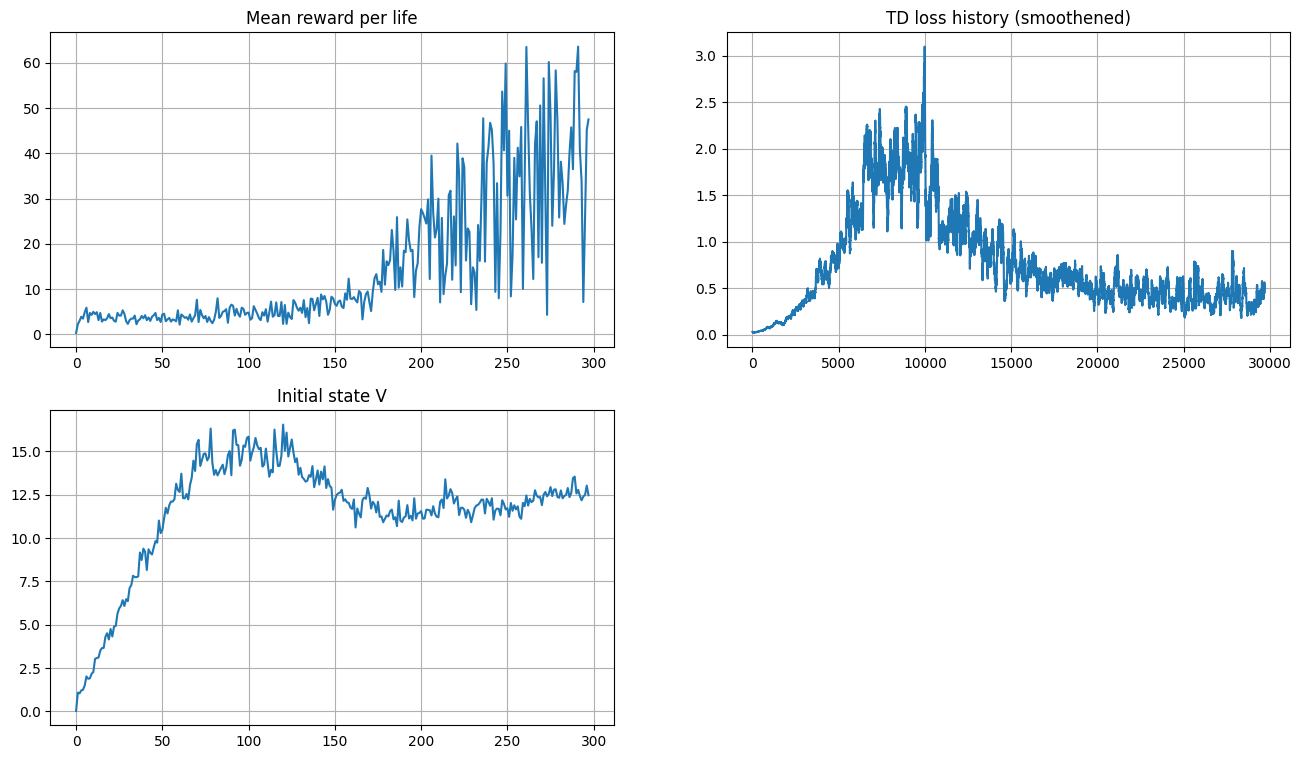

In [8]:
plot_results()

In [9]:
n_lives = 4
# env.start_video_recorder()
# from gym.wrappers import RecordVideo
# import gym
# env = gym.make("ALE/Assault-v5", render_mode="rgb_array")
# # env = preprocess_env(env)  # method with some other wrappers
# # env = RecordVideo(env, 'video', episode_trigger=lambda x: x == 2)
# # env.start_video_recorder()
# from IPython.display import clear_output
# import matplotlib.pyplot as plt

# for episode in range(4):
#     state = env.reset()
#     print(state)
#     done = False
#     while not done:
#         action = 2
#         next_state, reward, done, info = env.step(action)
#         print(next_state, reward, done, info)
#         state = next_state
#         clear_output(True)
#         plt.imshow(env.render(mode="rgb_array"))
#         plt.show()

# env.close()

frames = []

def evaluate(env, agent, n_games=1, greedy=False, t_max=10000):
    """ Plays n_games full games. If greedy, picks actions as argmax(qvalues). Returns mean reward. """
    rewards = []
    for _ in range(n_games):
        s = env.reset()
        
        reward = 0
        t = 0
        for _ in range(t_max):
            qvalues = agent.get_qvalues([s])
            action = 4
            action = qvalues.argmax(axis=-1)[0] if greedy else agent.sample_actions(qvalues)[0]
            s, r, done, _ = env.step(action)
            reward += r
            # clear_output(True)
            # plt.imshow(env.render(mode="rgb_array"))
            # plt.show()
            # plt.show()

            frames.append(env.render(mode="rgb_array"))

            if done:
                break

        rewards.append(reward)
    return np.mean(rewards)

print(evaluate(env, agent, n_games=n_lives, greedy=True) * n_lives)

# env.close_video_recorder()

# video.close()
env.close()

c:\Users\vinik\Githubik\ULTRA_SUPER_MEGA_POWER_v2_zxc\DQNAgent.py:28: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:264.)
  states = torch.tensor(states, device=model_device, dtype=torch.float32)


6567.0


In [10]:
# print(frames)

# real_frames = []

# print(len(frames))

# cnt = 0
# for i in frames:
#     real_frames.append(i.tolist())
#     print(cnt)
#     cnt += 1

# frames = real_frames

# print(len(frames))

In [13]:
import cv2
import os

video_name = 'video/video.mp4'

# frame = frames[0]
height, width, layers = frames[0].shape

print(height, width, layers)

# video = cv2.VideoWriter(video_name, 0, 1, (width,height))

out = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'mp4v'), 10, (width, height))
# print(out)
for f in frames:
    out.write(f)
out.release()

210 160 3
